## 在线性回归模型中使用梯度下降法

In [33]:
import numpy as np
import matplotlib.pyplot as plt

In [34]:
np.random.seed(666)
x = 2 * np.random.random(size=100)
y = x * 3. + 4. + np.random.normal(size = 100)

In [35]:
X = x.reshape(-1,1) 
X.shape

(100, 1)

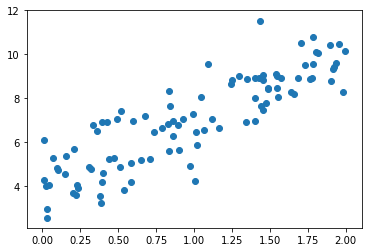

In [36]:
plt.scatter(x,y)

### 使用梯度下降法训练

In [37]:
def J(theta, x_b, y):
    try:
        return np.sum((y - x_b.dot(theta))**2) / len(x_b)
    except:
        return float('inf')

In [38]:
def dJ(theta,x_b,y):
    
    res = np.empty(len(theta))
    res[0] = np.sum(x_b.dot(theta)-y)
    for i in range(1,len(theta)):
        res[i] = (x_b.dot(theta)-y).dot(x_b[:,i])
        
    return res * 2 /len(x_b)

In [39]:
def gradient_descent(x_b,y,initial_theta, eta, n_iters = 1e4, epsilon = 1e-8):
    
    theta = initial_theta
    i_iter = 0
    
    while i_iter < n_iters:
        
        gradient = dJ(theta,x_b,y)
        last_theta = theta
        theta = theta - eta*gradient

        
        if(abs(J(theta,x_b,y)-J(last_theta,x_b,y)) < epsilon):
            break
            
        i_iter += 1
    return theta

In [40]:
X_b = np.hstack([np.ones((len(X),1)),X])
initial_theta =np.zeros(X_b.shape[1])
eta = 0.01

theta = gradient_descent(X_b,y,initial_theta,eta)

In [41]:
theta

array([4.02145786, 3.00706277])

### 封装我们的线性回归算法

In [42]:
from playML.LinearRegression import LinearRegression

In [43]:
lin_reg = LinearRegression()

In [44]:
lin_reg.fit_gd(X,y)

LinearRegression()

In [45]:
lin_reg.interception_

4.021457858204859

## 梯度下降法的向量化

In [46]:
from sklearn import datasets

In [47]:
boston  = datasets.load_boston()
X = boston.data
y =boston.target

X = X[y<50.0]
y = y[y<50.0]

In [48]:
from playML.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y,seed = 666)

In [49]:
lin_reg1 = LinearRegression()

In [50]:
lin_reg1.fit_normal(X_train,y_train)
lin_reg1.score(X_test,y_test)

0.81298026026586

### 使用梯度下降法

In [51]:
lin_reg2 = LinearRegression()
lin_reg2.fit_gd(X_train, y_train)

E:\Anaconda\lib\site-packages\numpy\core\fromnumeric.py:86: RuntimeWarning: overflow encountered in reduce
  return ufunc.reduce(obj, axis, dtype, out, **passkwargs)
E:\jupyter_work\playML\LinearRegression.py:41: RuntimeWarning: overflow encountered in square
  return np.sum((y - x_b.dot(theta)) ** 2) / len(x_b)
E:\jupyter_work\playML\LinearRegression.py:60: RuntimeWarning: invalid value encountered in double_scalars
  if abs(J(theta, x_b, y) - J(last_theta, x_b, y)) < epsilon:


LinearRegression()

In [52]:
lin_reg2.fit_gd(X_train, y_train,eta = 0.000001)

LinearRegression()

In [53]:
lin_reg2.score(X_test, y_test)

0.27556634853389195

In [54]:
%time lin_reg2.fit_gd(X_train, y_train,eta = 0.000001,n_iters = 1e6)

Wall time: 44.2 s


LinearRegression()

In [55]:
lin_reg2.score(X_test,y_test)

0.7541852353980762

### 使用梯度下降法前进行数据归一化

In [56]:
from sklearn.preprocessing import StandardScaler

In [57]:
standardScaler = StandardScaler()

In [58]:
standardScaler.fit(X_train)

StandardScaler(copy=True, with_mean=True, with_std=True)

In [63]:
X_train_standard = standardScaler.transform(X_train)

In [64]:
lin_reg3 = LinearRegression()

In [65]:
%time lin_reg3.fit_gd(X_train_standard,y_train)

Wall time: 183 ms


LinearRegression()

In [66]:
X_test_standard = standardScaler.transform(X_test)

In [67]:
lin_reg3.score(X_test_standard,y_test)

0.8129880620122235

### 梯度下降法的优势

#### 运行速度快